In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler


sns.set_theme()
sns.set_style('whitegrid')
sns.set_palette(['#3F7C85', '#FF5F5D', '#00CCBF', '#72F2EB', '#747E7E'])




1. loading data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS7 DATSET/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:


df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1333,False
1334,False
1335,False
1336,False


In [ ]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1337, 7)

<Axes: xlabel='age'>

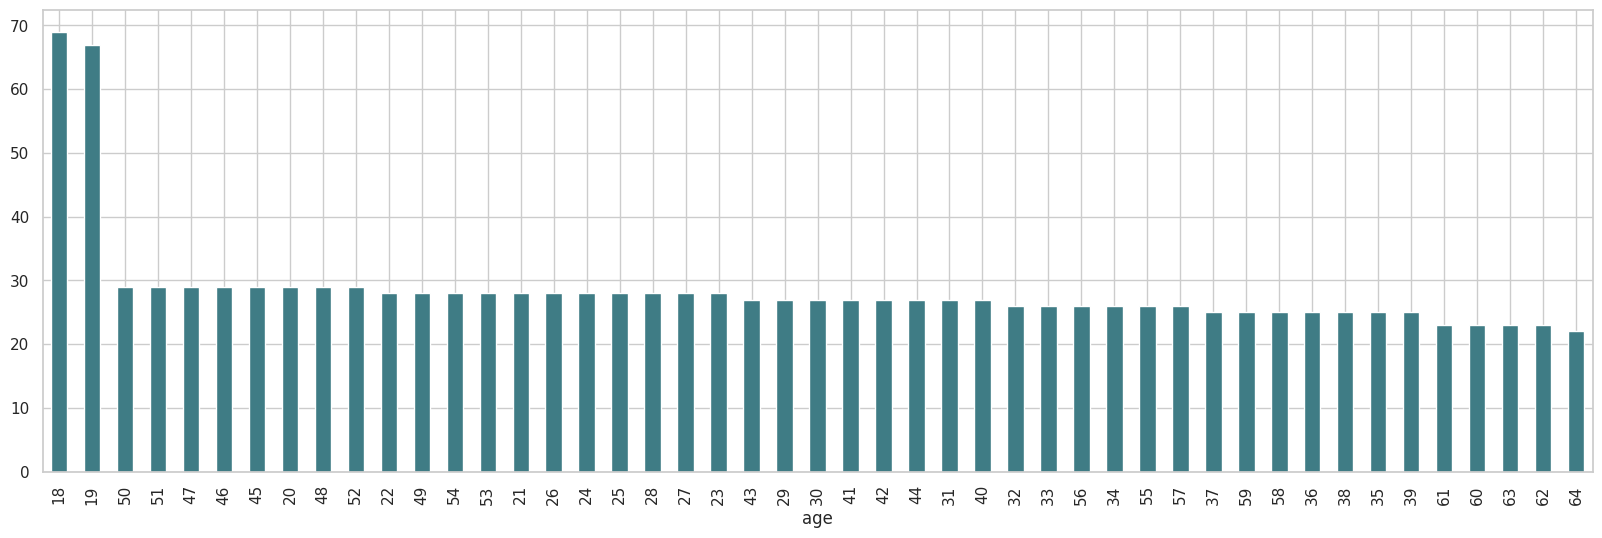

In [ ]:
df['age'].value_counts().plot(kind='bar',figsize=(20, 6))

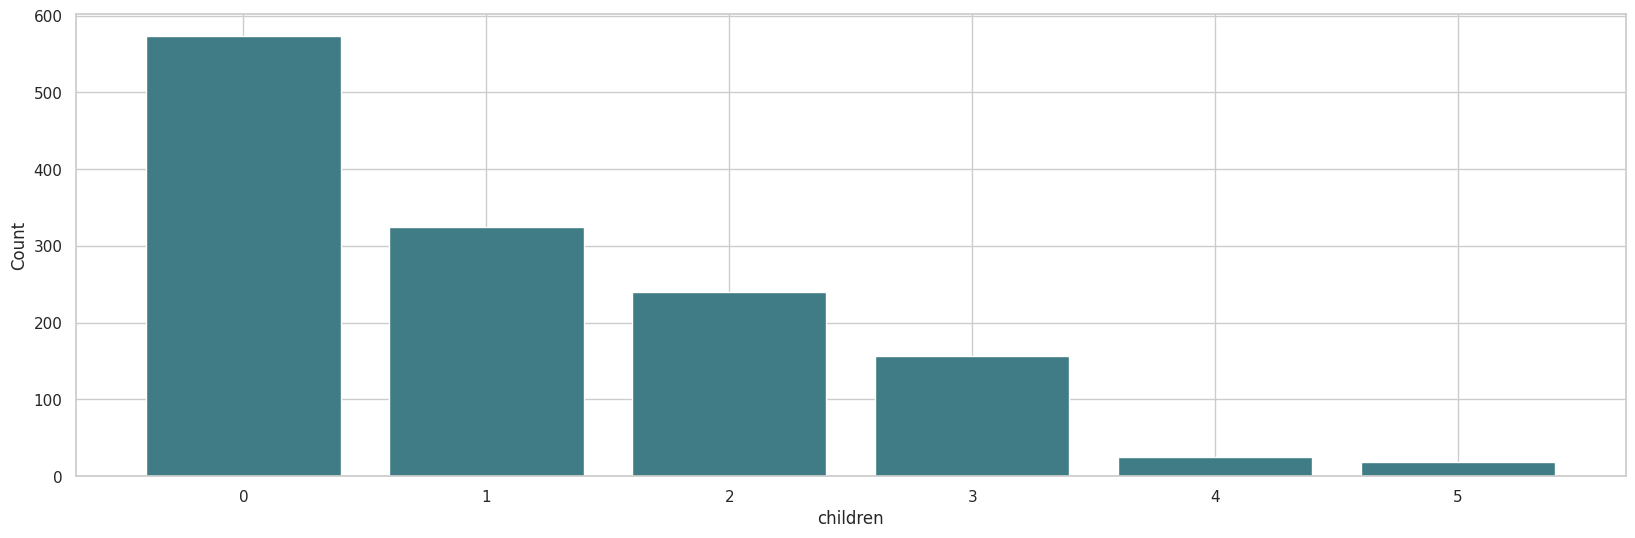

In [ ]:
plt.figure(figsize=(20, 6))
plt.bar(df['children'].value_counts().index, df['children'].value_counts().values)
plt.xlabel('children')
plt.ylabel('Count')
plt.show()

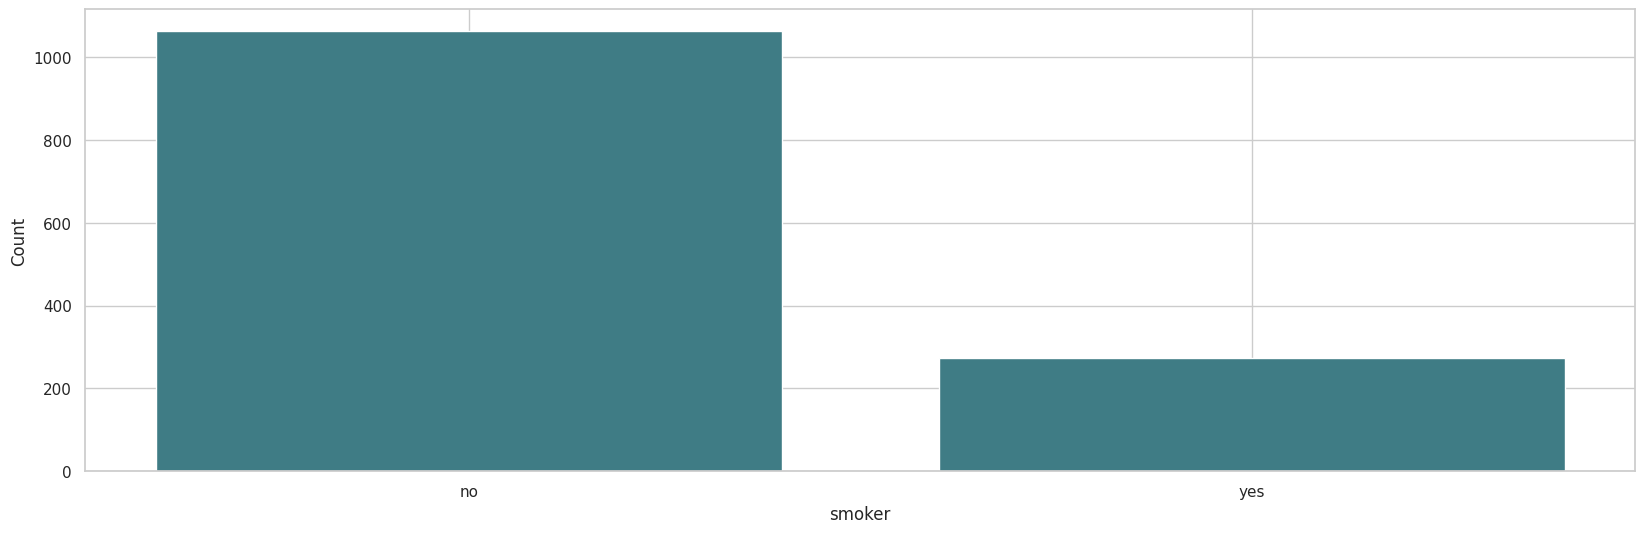

In [ ]:
plt.figure(figsize=(20, 6))
plt.bar(df['smoker'].value_counts().index, df['smoker'].value_counts().values)
plt.xlabel('smoker')
plt.ylabel('Count')
plt.show()

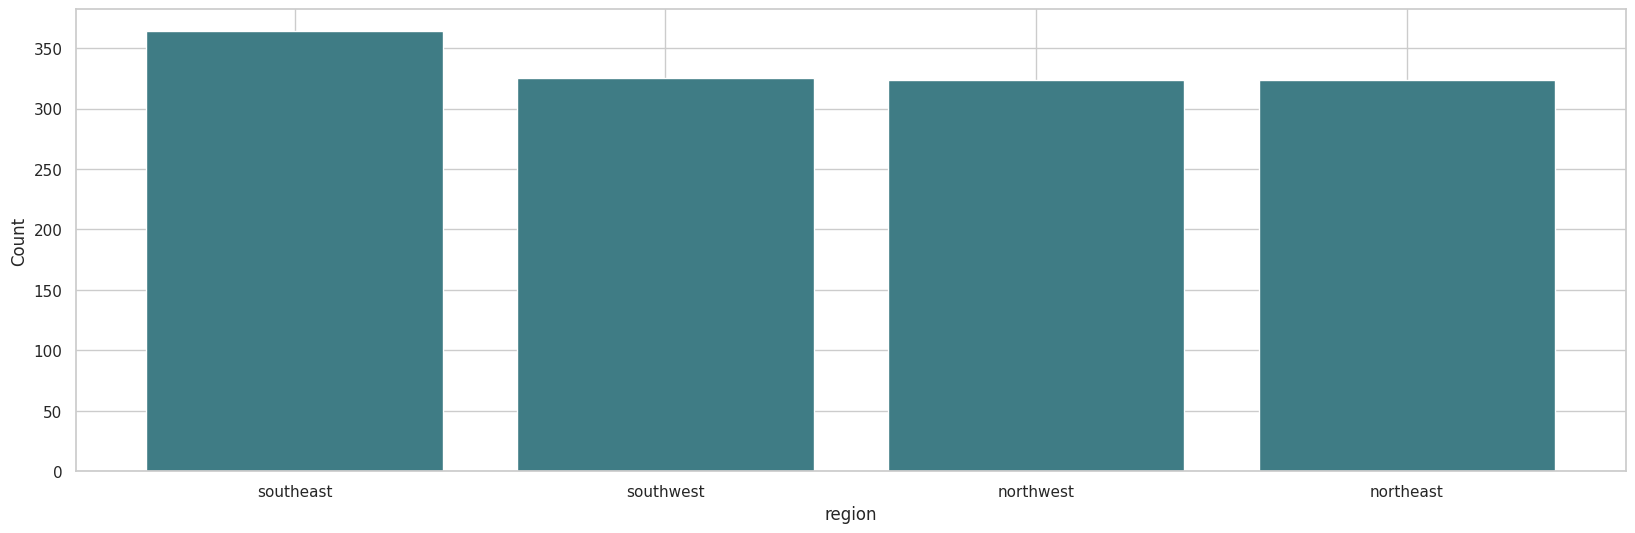

In [ ]:
plt.figure(figsize=(20, 6))
plt.bar(df['region'].value_counts().index, df['region'].value_counts().values)
plt.xlabel('region')
plt.ylabel('Count')
plt.show()

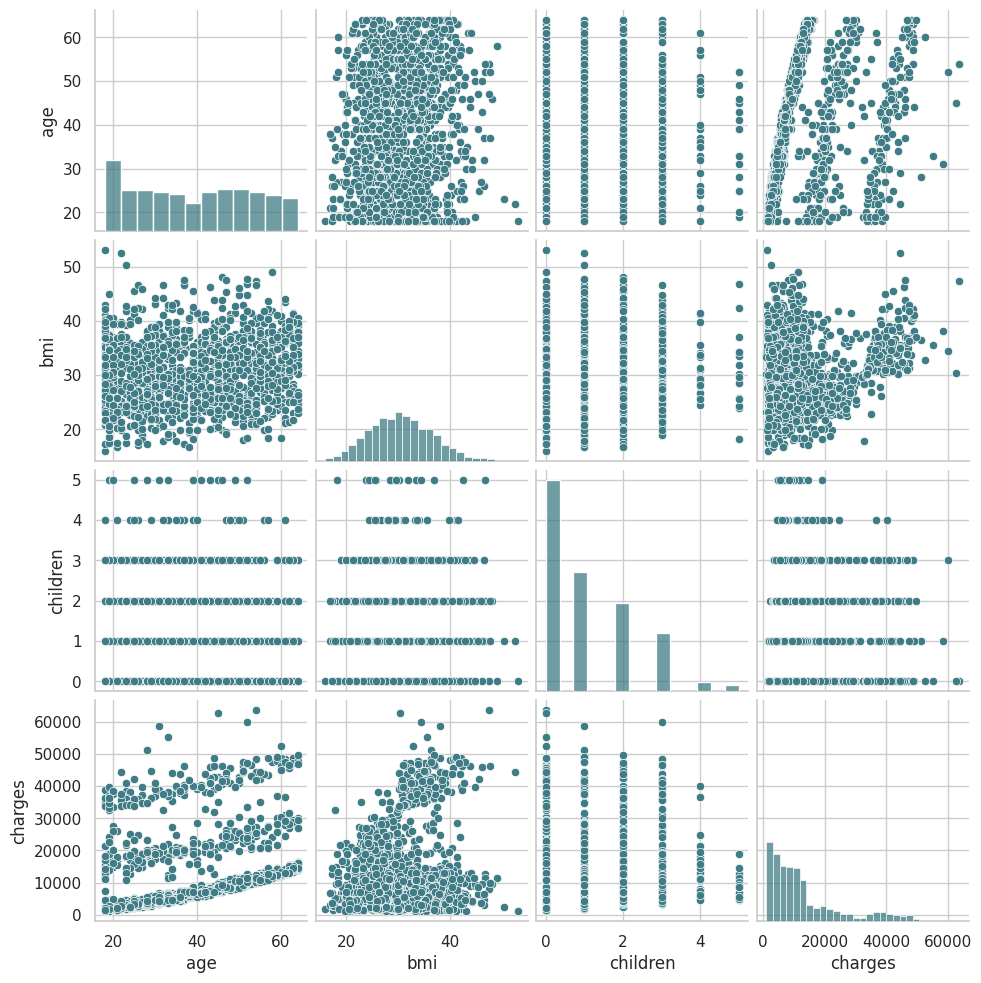

In [ ]:
# pairwise relationships
sns.pairplot(df, diag_kind='auto')
plt.show()

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

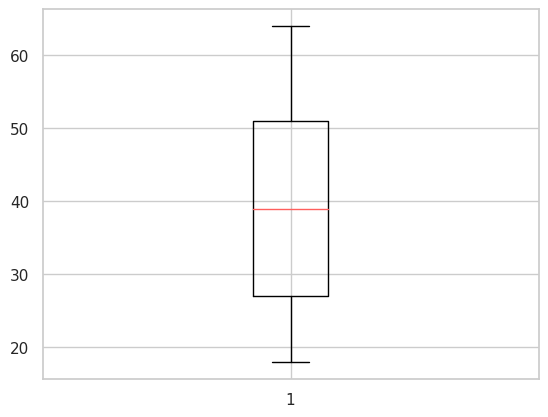

In [ ]:
plt.boxplot(df['age'])
plt.show()

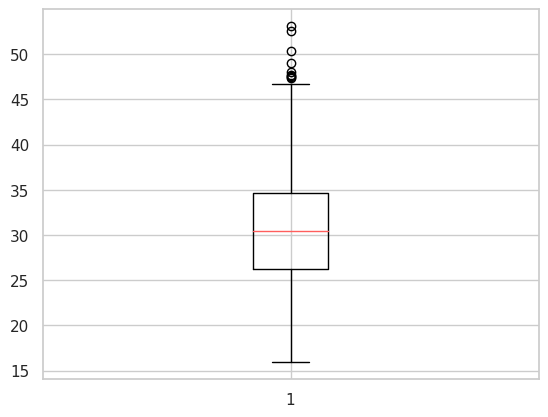

In [ ]:
plt.boxplot(df['bmi'])
plt.show()

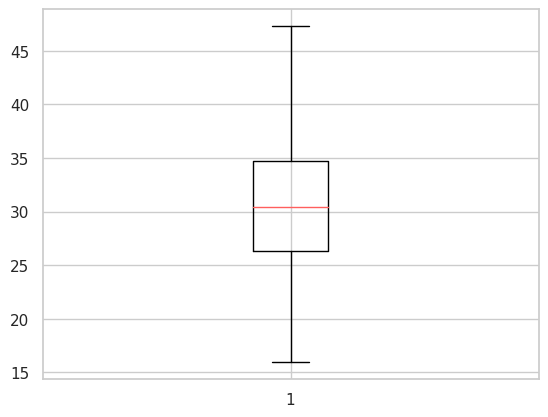

In [ ]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df['bmi'] = df['bmi'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

plt.boxplot(df['bmi'])
plt.show()

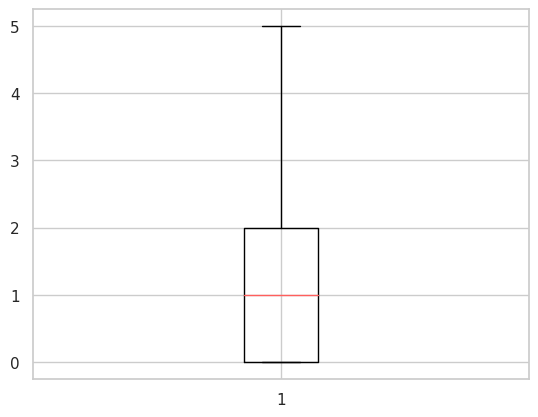

In [ ]:
plt.boxplot(df['children'])
plt.show()

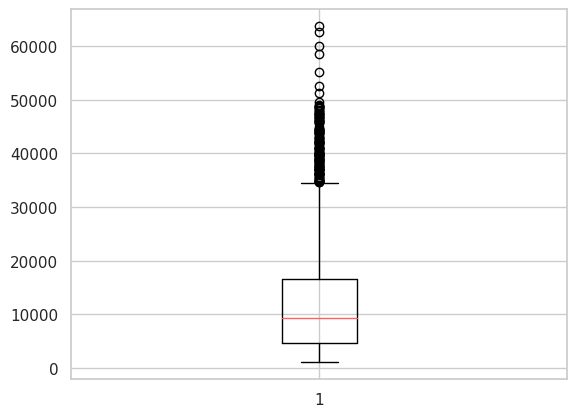

In [ ]:
plt.boxplot(df['charges'])
plt.show()

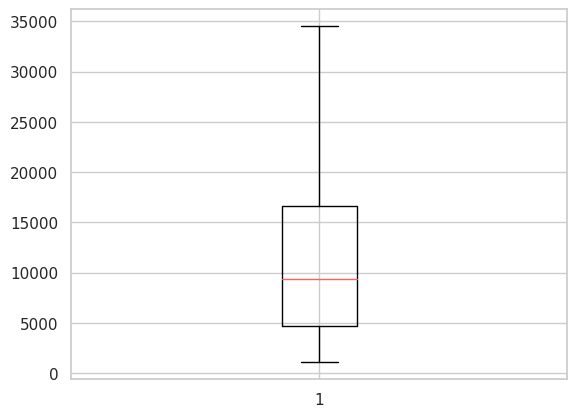

In [ ]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df['charges'] = df['charges'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

plt.boxplot(df['charges'])
plt.show()

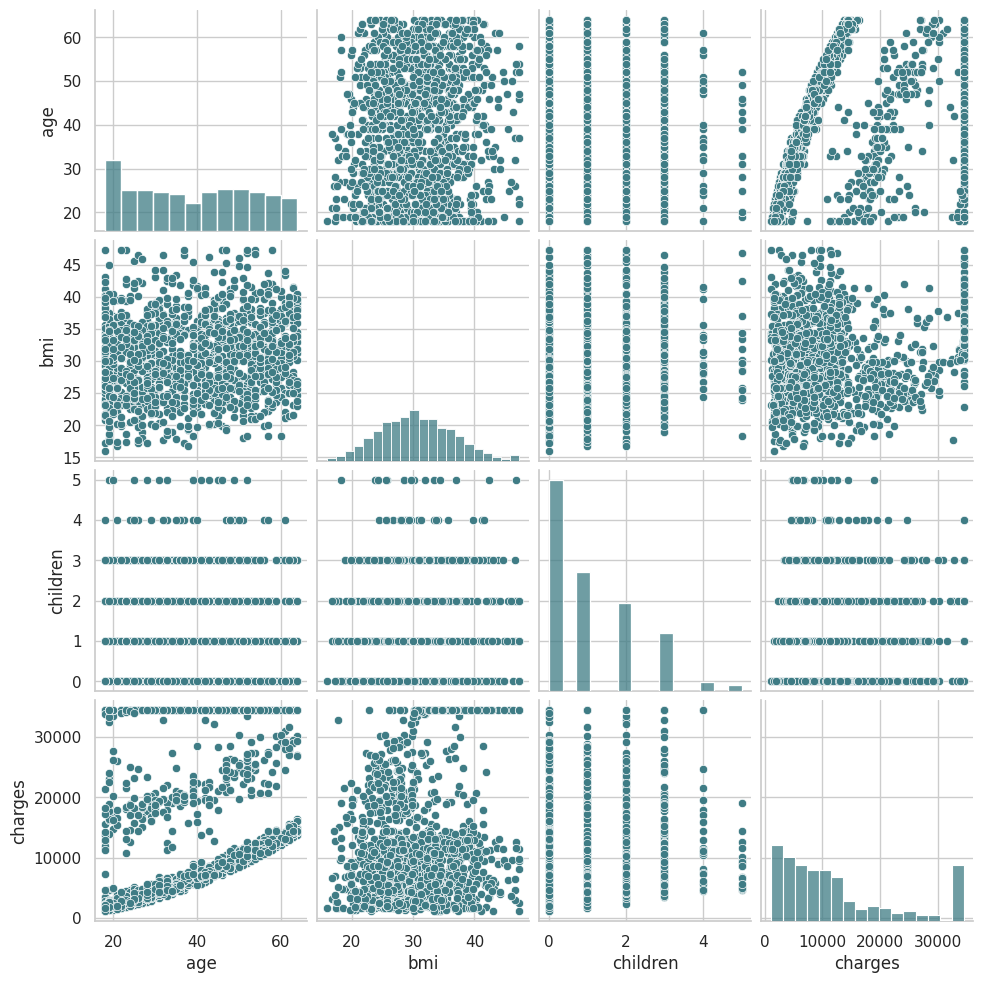

In [ ]:
# pairwise relationships
sns.pairplot(df, diag_kind='auto')
plt.show()

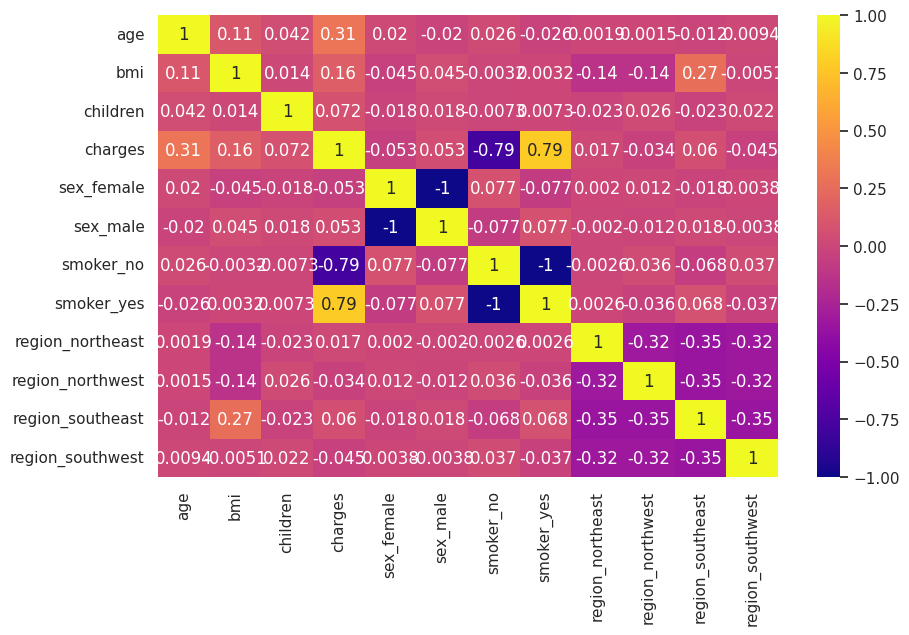

In [ ]:
# Checking for correlation
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='plasma')
plt.show()


positive realtionship with : smoker , age , bmi , children, male, regon south east

In [ ]:
df_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [ ]:
df["sex"]

,sex
0,female
1,male
2,male
3,male
4,male
...,...
1333,male
1334,female
1335,female
1336,female


In [ ]:
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
dfDummies = pd.get_dummies(df, columns=["sex", "smoker","region","children"], prefix=["sex", "smoker","region","children"], dtype=int)

In [ ]:
dfDummies

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,children_0,children_1,children_2,children_3,children_4,children_5
0,19,27.900,16884.92400,1,0,0,1,0,0,0,1,1,0,0,0,0,0
1,18,33.770,1725.55230,0,1,1,0,0,0,1,0,0,1,0,0,0,0
2,28,33.000,4449.46200,0,1,1,0,0,0,1,0,0,0,0,1,0,0
3,33,22.705,21984.47061,0,1,1,0,0,1,0,0,1,0,0,0,0,0
4,32,28.880,3866.85520,0,1,1,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,0,1,1,0,0,1,0,0,0,0,0,1,0,0
1334,18,31.920,2205.98080,1,0,1,0,1,0,0,0,1,0,0,0,0,0
1335,18,36.850,1629.83350,1,0,1,0,0,0,1,0,1,0,0,0,0,0
1336,21,25.800,2007.94500,1,0,1,0,0,0,0,1,1,0,0,0,0,0


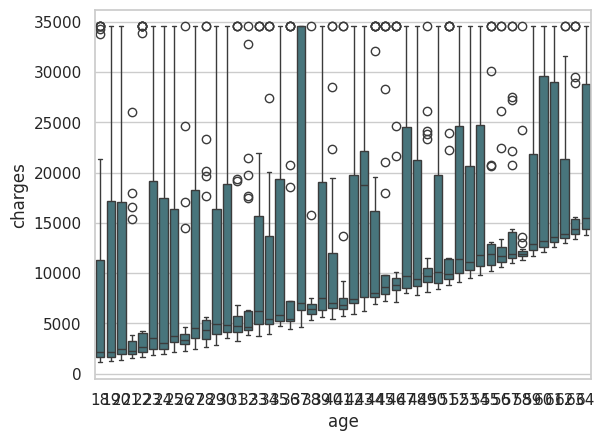

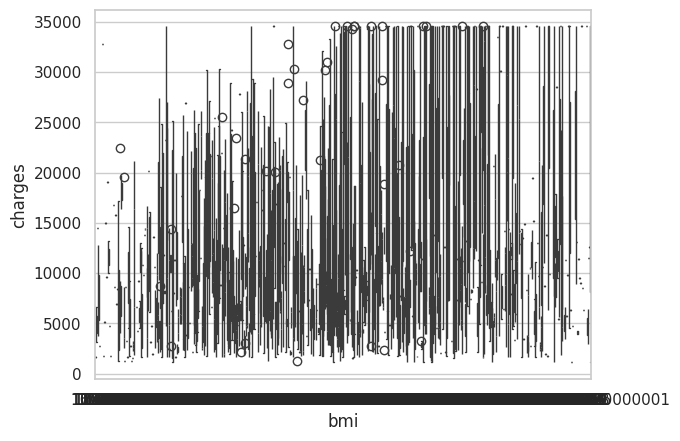

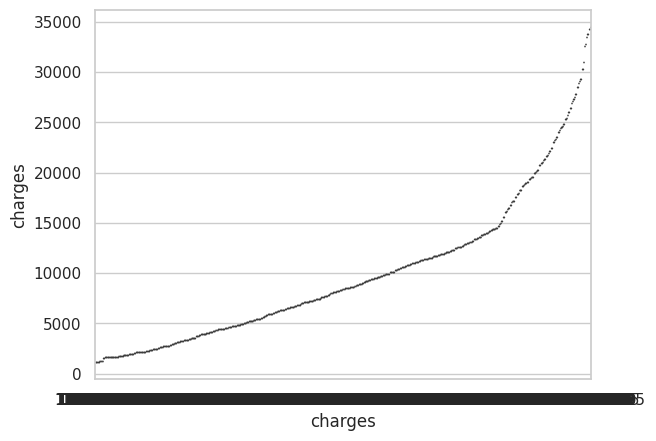

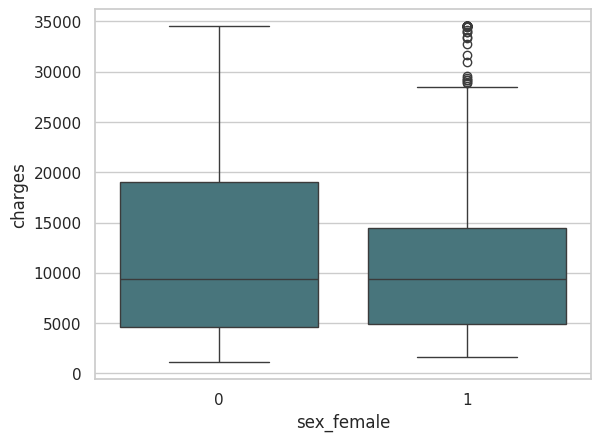

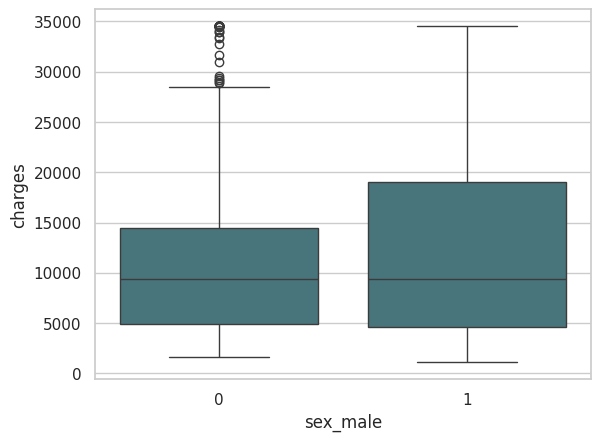

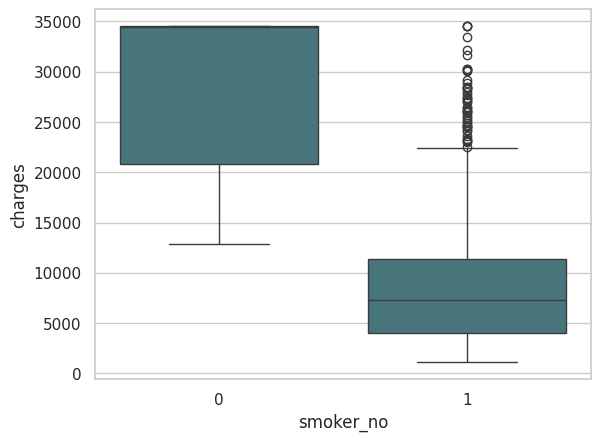

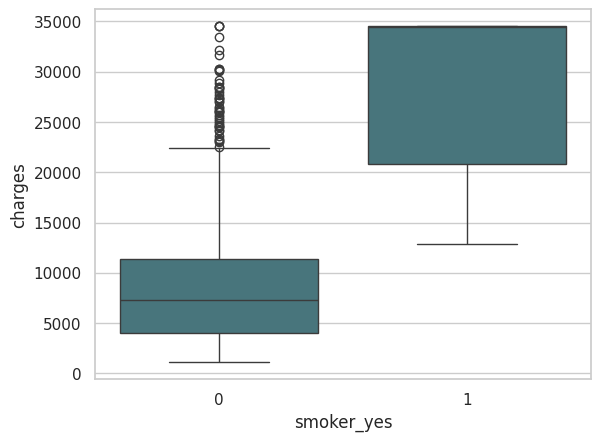

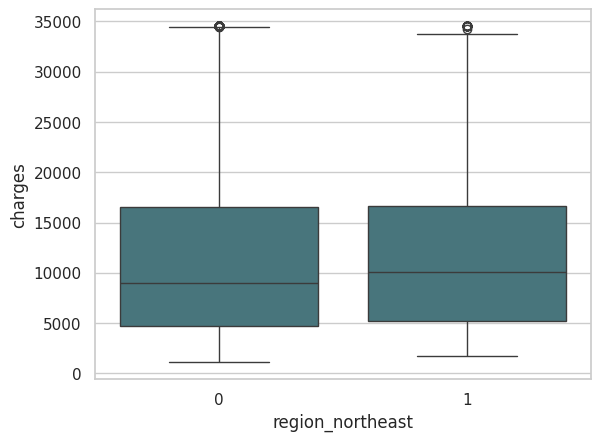

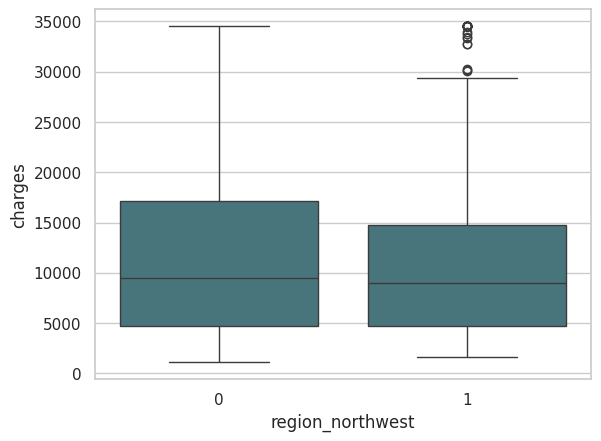

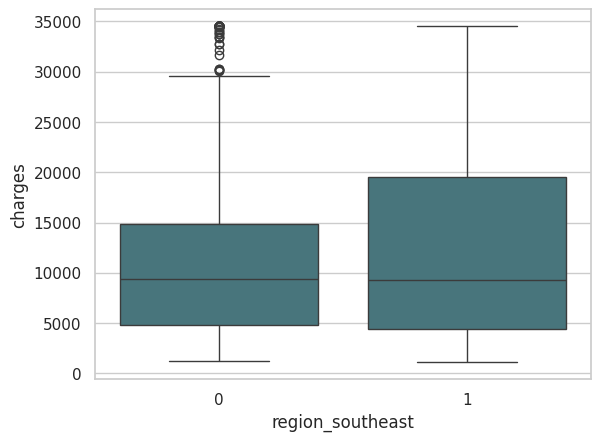

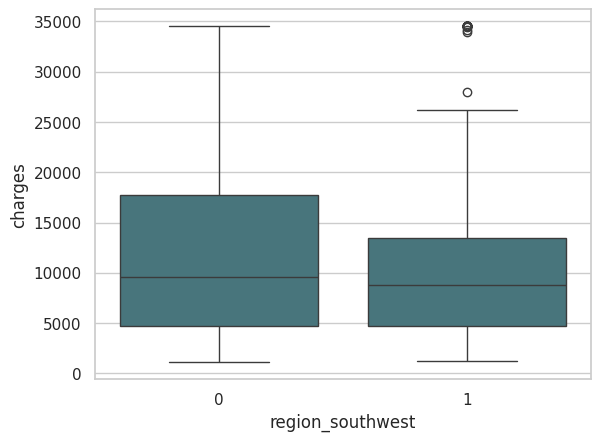

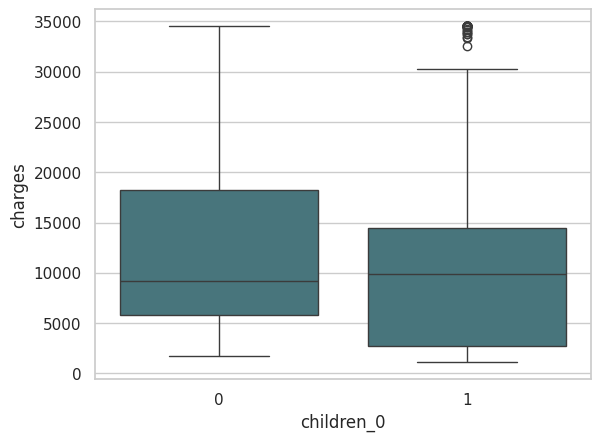

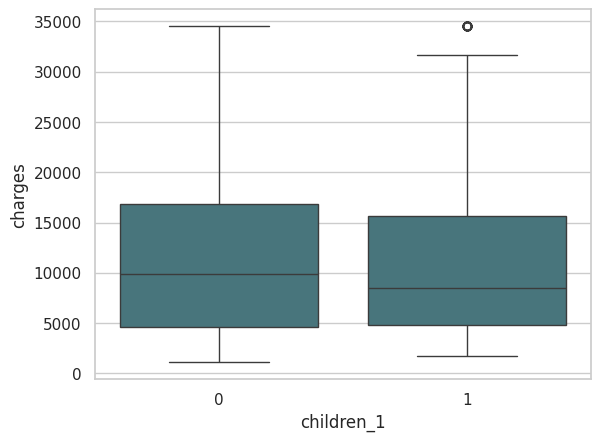

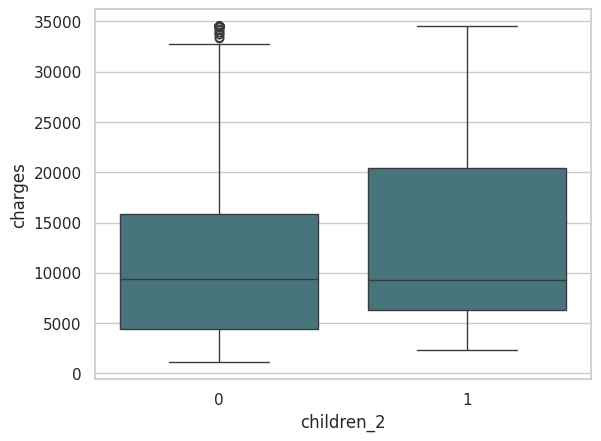

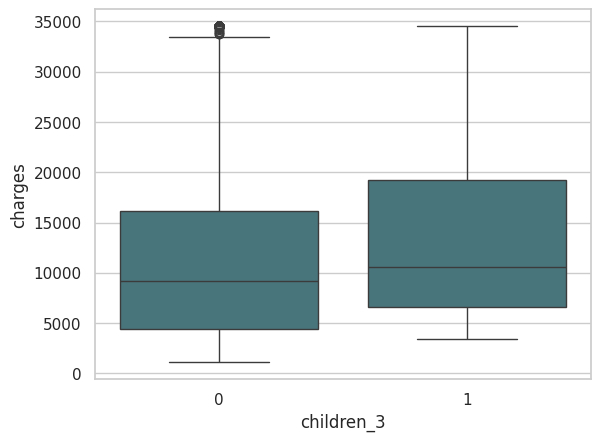

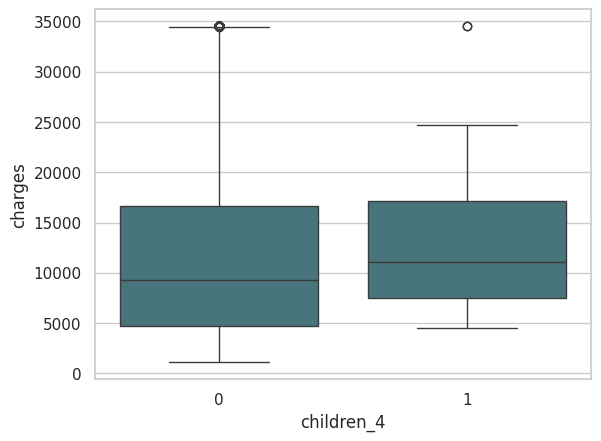

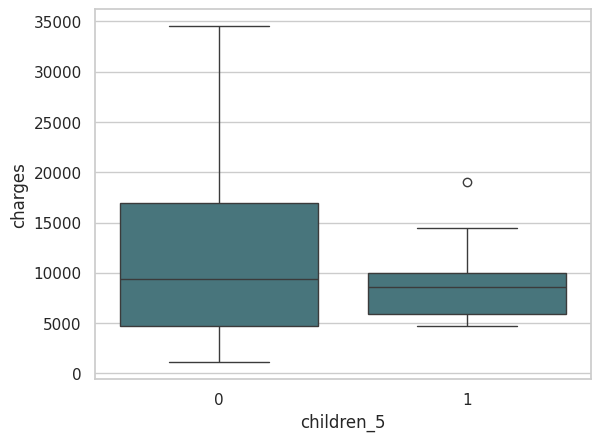

In [ ]:
for col in ['age', 'bmi', 'charges', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'children_0', 'children_1', 'children_2', 'children_3', 'children_4', 'children_5']:
  plt.figure()
  sns.boxplot(data=dfDummies, x=col, y="charges")
  plt.show()

In [ ]:
scaler = StandardScaler()

In [ ]:
dfDummies[['age', 'bmi']] = scaler.fit_transform(dfDummies[['age', 'bmi']])

In [ ]:
dfDummies

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,children_0,children_1,children_2,children_3,children_4,children_5
0,-1.440418,-0.454032,16884.92400,1,0,0,1,0,0,0,1,1,0,0,0,0,0
1,-1.511647,0.515033,1725.55230,0,1,1,0,0,0,1,0,0,1,0,0,0,0
2,-0.799350,0.387915,4449.46200,0,1,1,0,0,0,1,0,0,0,0,1,0,0
3,-0.443201,-1.311662,21984.47061,0,1,1,0,0,1,0,0,1,0,0,0,0,0
4,-0.514431,-0.292246,3866.85520,0,1,1,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.767704,0.052787,10600.54830,0,1,1,0,0,1,0,0,0,0,0,1,0,0
1334,-1.511647,0.209621,2205.98080,1,0,1,0,1,0,0,0,1,0,0,0,0,0
1335,-1.511647,1.023503,1629.83350,1,0,1,0,0,0,1,0,1,0,0,0,0,0
1336,-1.297958,-0.800716,2007.94500,1,0,1,0,0,0,0,1,1,0,0,0,0,0


In [ ]:
joblib.dump(scaler, '/content/drive/MyDrive/insurance model/insurance_scaler2.pkl')

['/content/drive/MyDrive/Colab Notebooks/insurance_scaler.pkl']

In [ ]:
dfDummies.to_csv('/content/drive/MyDrive/DS7 DATSET/insurance_processed.csv', index=False)